In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
app_tr = pd.read_csv('application_train.csv')
app_ts = pd.read_csv('application_test.csv')

Some quick feature engineering before we impute missing values

In [4]:
def indic(x):
    if x:
        return 1
    else:
        return 0

In [5]:
app_tr['NAME_TYPE_SUITE_ISNULL'] = app_tr['NAME_TYPE_SUITE'].isnull()

In [6]:
app_tr['NAME_TYPE_SUITE_ISNULL'] = app_tr['NAME_TYPE_SUITE_ISNULL'].apply(lambda x:indic(x))

In [7]:
app_ts['NAME_TYPE_SUITE_ISNULL'] = app_ts['NAME_TYPE_SUITE'].isnull()
app_ts['NAME_TYPE_SUITE_ISNULL'] = app_ts['NAME_TYPE_SUITE_ISNULL'].apply(lambda x:indic(x))

A person who owns car and doesn't know  the age is probably irresponsible or his car is really really old

In [8]:
app_tr[app_tr['OWN_CAR_AGE'].isnull()]['FLAG_OWN_CAR'].value_counts()

N    202924
Y         5
Name: FLAG_OWN_CAR, dtype: int64

In [9]:
app_tr['OWN_CAR_AGE_ISNULL_HAS_CAR'] = app_tr['OWN_CAR_AGE'].isnull().multiply(app_tr['FLAG_OWN_CAR']=='Y')
app_tr['OWN_CAR_AGE_ISNULL_HAS_CAR'] = app_tr['OWN_CAR_AGE_ISNULL_HAS_CAR'].apply(lambda x:indic(x))

In [10]:
app_tr[app_tr['OWN_CAR_AGE_ISNULL_HAS_CAR']==1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_ISNULL,OWN_CAR_AGE_ISNULL_HAS_CAR
30897,135867,0,Cash loans,M,Y,N,1,495000.0,1006920.0,45630.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
181231,310040,0,Cash loans,F,Y,N,0,112500.0,301464.0,22068.0,...,0,0,0.0,0.0,0.0,1.0,0.0,5.0,1,1
217549,352070,0,Cash loans,M,Y,N,0,225000.0,900000.0,26446.5,...,0,0,0.0,0.0,0.0,0.0,1.0,5.0,0,1
229867,366246,0,Cash loans,F,Y,Y,1,225000.0,518562.0,25078.5,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,1
236868,374361,0,Cash loans,F,Y,Y,0,225000.0,233833.5,26577.0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,1,1


In [11]:
app_ts['OWN_CAR_AGE_ISNULL_HAS_CAR'] = app_ts['OWN_CAR_AGE'].isnull().multiply(app_tr['FLAG_OWN_CAR']=='Y')
app_ts['OWN_CAR_AGE_ISNULL_HAS_CAR'] = app_ts['OWN_CAR_AGE_ISNULL_HAS_CAR'].apply(lambda x:indic(x))

In [12]:
app_tr['OCCUPATION_TYPE_ISNULL'] = app_tr['OCCUPATION_TYPE'].isnull()
app_tr['OCCUPATION_TYPE_ISNULL'] = app_tr['OCCUPATION_TYPE_ISNULL'].apply(lambda x:indic(x))

In [13]:
app_ts['OCCUPATION_TYPE_ISNULL'] = app_ts['OCCUPATION_TYPE'].isnull()
app_ts['OCCUPATION_TYPE_ISNULL'] = app_ts['OCCUPATION_TYPE_ISNULL'].apply(lambda x:indic(x))

In [14]:
app_tr['EXT_SOURCE_1_ISNULL'] = app_tr['EXT_SOURCE_1'].isnull()
app_tr['EXT_SOURCE_1_ISNULL'] = app_tr['EXT_SOURCE_1_ISNULL'].apply(lambda x:indic(x))

In [15]:
app_ts['EXT_SOURCE_1_ISNULL'] = app_ts['EXT_SOURCE_1'].isnull()
app_ts['EXT_SOURCE_1_ISNULL'] = app_ts['EXT_SOURCE_1_ISNULL'].apply(lambda x:indic(x))

In [16]:
app_tr['EXT_SOURCE_3_ISNULL'] = app_tr['EXT_SOURCE_3'].isnull()
app_tr['EXT_SOURCE_3_ISNULL'] = app_tr['EXT_SOURCE_3_ISNULL'].apply(lambda x:indic(x))

In [17]:
app_ts['EXT_SOURCE_3_ISNULL'] = app_ts['EXT_SOURCE_3'].isnull()
app_ts['EXT_SOURCE_3_ISNULL'] = app_ts['EXT_SOURCE_3_ISNULL'].apply(lambda x:indic(x))

In [18]:
missing_cols = app_ts[app_ts.isnull()].columns

In [19]:
app_tr[app_tr['APARTMENTS_AVG'].isnull().multiply(app_tr['FLAG_OWN_REALTY']=='N')]['APARTMENTS_AVG']

16       NaN
33       NaN
42       NaN
48       NaN
56       NaN
63       NaN
76       NaN
83       NaN
95       NaN
101      NaN
106      NaN
113      NaN
114      NaN
128      NaN
132      NaN
133      NaN
142      NaN
146      NaN
150      NaN
159      NaN
163      NaN
173      NaN
174      NaN
177      NaN
193      NaN
195      NaN
198      NaN
215      NaN
231      NaN
239      NaN
          ..
307252   NaN
307264   NaN
307266   NaN
307267   NaN
307268   NaN
307269   NaN
307294   NaN
307306   NaN
307312   NaN
307347   NaN
307354   NaN
307365   NaN
307366   NaN
307379   NaN
307380   NaN
307381   NaN
307388   NaN
307409   NaN
307420   NaN
307428   NaN
307431   NaN
307436   NaN
307443   NaN
307451   NaN
307452   NaN
307460   NaN
307484   NaN
307488   NaN
307494   NaN
307496   NaN
Name: APARTMENTS_AVG, Length: 49377, dtype: float64

In [20]:
home_cols = missing_cols[43:85]
home_cols

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'],
      dtype='object')

In [21]:
for col in home_cols:
    app_tr[col+'_ISNULL'] = app_tr[col].isnull()
    app_tr[col+'_ISNULL'] = app_tr[col+'_ISNULL'].apply(lambda x:indic(x))

In [22]:
for col in home_cols:
    app_ts[col+'_ISNULL'] = app_ts[col].isnull()
    app_ts[col+'_ISNULL'] = app_ts[col+'_ISNULL'].apply(lambda x:indic(x))

In [23]:
app_tr['AMT_REQ_CREDIT_BUREAU_ISNULL'] = app_tr['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()
app_tr['AMT_REQ_CREDIT_BUREAU_ISNULL'] = app_tr['AMT_REQ_CREDIT_BUREAU_ISNULL'].apply(lambda x:indic(x))

In [24]:
app_ts['AMT_REQ_CREDIT_BUREAU_ISNULL'] = app_ts['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()
app_ts['AMT_REQ_CREDIT_BUREAU_ISNULL'] = app_ts['AMT_REQ_CREDIT_BUREAU_ISNULL'].apply(lambda x:indic(x))

In [25]:
app_tr['CREDIT_INCOME_RATIO'] = app_tr['AMT_CREDIT']/app_tr['AMT_INCOME_TOTAL']

In [26]:
app_ts['CREDIT_INCOME_RATIO'] = app_tr['AMT_CREDIT']/app_ts['AMT_INCOME_TOTAL']

In [27]:
app_tr['ANNUITY_INCOME_RATIO'] = app_tr['AMT_ANNUITY']/app_tr['AMT_INCOME_TOTAL']

In [28]:
app_ts['ANNUITY_INCOME_RATIO'] = app_ts['AMT_ANNUITY']/app_ts['AMT_INCOME_TOTAL']

In [29]:
app_tr['CREDIT_GOODS_PRICE_DIFF'] = app_tr['AMT_CREDIT'] - app_tr['AMT_GOODS_PRICE']

In [30]:
app_ts['CREDIT_GOODS_PRICE_DIFF'] = app_ts['AMT_CREDIT'] - app_ts['AMT_GOODS_PRICE']

In [31]:
app_tr['ENTIRE_INCOME'] = -app_tr['AMT_INCOME_TOTAL']*app_tr['DAYS_EMPLOYED']

In [32]:
app_ts['ENTIRE_INCOME'] = -app_ts['AMT_INCOME_TOTAL']*app_ts['DAYS_EMPLOYED']

In [33]:
app_tr['CREDIT_ENTIRE_INCOME_RATIO'] = app_tr['AMT_CREDIT']/app_tr['ENTIRE_INCOME']
app_ts['CREDIT_ENTIRE_INCOME_RATIO'] = app_tr['AMT_CREDIT']/app_ts['ENTIRE_INCOME']
app_tr['ANNUITY_ENTIRE_INCOME_RATIO'] = app_tr['AMT_ANNUITY']/app_tr['ENTIRE_INCOME']
app_ts['ANNUITY_ENTIRE_INCOME_RATIO'] = app_ts['AMT_ANNUITY']/app_ts['ENTIRE_INCOME']

In [34]:
app_tr['RIGHT_NUMBER'] = app_tr['FLAG_MOBIL']*app_tr['FLAG_CONT_MOBILE']

In [35]:
app_ts['RIGHT_NUMBER'] = app_ts['FLAG_MOBIL']*app_ts['FLAG_CONT_MOBILE']

In [36]:
app_tr['INCOME_PER_CHILD'] = app_tr['AMT_INCOME_TOTAL']/app_tr['CNT_CHILDREN']

In [37]:
app_ts['INCOME_PER_CHILD'] = app_ts['AMT_INCOME_TOTAL']/app_ts['CNT_CHILDREN']

In [38]:
app_tr['INCOME_PER_FAM_MEMBER'] = app_tr['AMT_INCOME_TOTAL']/app_tr['CNT_FAM_MEMBERS']
app_ts['INCOME_PER_FAM_MEMBER'] = app_ts['AMT_INCOME_TOTAL']/app_ts['CNT_FAM_MEMBERS']

In [39]:
app_tr['ENTIRE_INCOME_PER_FAM_MEMBER'] = app_tr['ENTIRE_INCOME']/app_tr['CNT_FAM_MEMBERS']
app_ts['ENTIRE_INCOME_PER_FAM_MEMBER'] = app_ts['ENTIRE_INCOME']/app_ts['CNT_FAM_MEMBERS']

In [40]:
app_tr['ENTIRE_INCOME_PER_CHILD'] = app_tr['ENTIRE_INCOME']/app_tr['CNT_CHILDREN']
app_ts['ENTIRE_INCOME_PER_CHILD'] = app_ts['ENTIRE_INCOME']/app_ts['CNT_CHILDREN']

In [41]:
app_tr['AMT_CREDIT_DECIMAL'] = app_tr['AMT_CREDIT']%1==0
app_tr['AMT_CREDIT_DECIMAL'] = app_tr['AMT_CREDIT_DECIMAL'].apply(lambda x:indic(x))

In [42]:
app_ts['AMT_CREDIT_DECIMAL'] = app_ts['AMT_CREDIT']%1==0
app_ts['AMT_CREDIT_DECIMAL'] = app_ts['AMT_CREDIT_DECIMAL'].apply(lambda x:indic(x))

Now let's fill the nans

In [43]:
y = app_tr['TARGET'].values

In [44]:
app_tr.drop('TARGET', inplace=True, axis=1)

In [45]:
app_tr['CNT_FAM_MEMBERS'].fillna(1,inplace=True)

In [46]:
app_ts['CNT_FAM_MEMBERS'].fillna(1,inplace=True)

In [47]:
app_tr[app_tr['NAME_TYPE_SUITE'].isnull().multiply(app_tr['CNT_CHILDREN']>0)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_GOODS_PRICE_DIFF,ENTIRE_INCOME,CREDIT_ENTIRE_INCOME_RATIO,ANNUITY_ENTIRE_INCOME_RATIO,RIGHT_NUMBER,INCOME_PER_CHILD,INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_CHILD,AMT_CREDIT_DECIMAL
724,100837,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,...,NaN,1.714500e+07,0.007874,3.937008e-04,1,22500.0,11250.0,4.286250e+06,8.572500e+06,1
1669,101954,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,...,329670.0,2.813670e+08,0.004130,1.089467e-04,1,76500.0,51000.0,9.378900e+07,1.406835e+08,1
2625,103065,Cash loans,F,N,Y,1,112500.0,593010.0,16434.0,495000.0,...,98010.0,2.026125e+08,0.002927,8.111049e-05,1,112500.0,37500.0,6.753750e+07,2.026125e+08,1
3050,103560,Cash loans,F,N,N,2,225000.0,1506816.0,45814.5,1350000.0,...,156816.0,4.617000e+08,0.003264,9.923002e-05,1,112500.0,56250.0,1.154250e+08,2.308500e+08,1
3371,103938,Cash loans,F,N,N,1,1350000.0,2410380.0,109053.0,2250000.0,...,160380.0,1.138050e+09,0.002118,9.582444e-05,1,1350000.0,450000.0,3.793500e+08,1.138050e+09,1
4063,104754,Cash loans,M,Y,N,2,112500.0,373311.0,13963.5,283500.0,...,89811.0,3.386250e+08,0.001102,4.123588e-05,1,56250.0,28125.0,8.465625e+07,1.693125e+08,1
4428,105177,Cash loans,M,Y,Y,1,195750.0,225000.0,14764.5,225000.0,...,0.0,5.639558e+08,0.000399,2.618025e-05,1,195750.0,65250.0,1.879852e+08,5.639558e+08,1
5804,106785,Cash loans,F,N,N,1,157500.0,808650.0,23305.5,675000.0,...,133650.0,7.193025e+08,0.001124,3.240014e-05,1,157500.0,78750.0,3.596512e+08,7.193025e+08,1
6703,107822,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,...,NaN,1.092285e+08,0.001648,8.239608e-05,1,121500.0,40500.0,3.640950e+07,1.092285e+08,1
6977,108127,Cash loans,M,Y,N,2,112500.0,500211.0,25537.5,463500.0,...,36711.0,1.642500e+07,0.030454,1.554795e-03,1,56250.0,28125.0,4.106250e+06,8.212500e+06,1


In [48]:
indices_tr = app_tr[app_tr['NAME_TYPE_SUITE'].isnull().multiply(app_tr['CNT_CHILDREN']>0)].index

In [49]:
for index in indices_tr:
    app_tr['NAME_TYPE_SUITE'][index] = 'Children'

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
indices_ts = app_ts[app_ts['NAME_TYPE_SUITE'].isnull().multiply(app_ts['CNT_CHILDREN']>0)].index

In [51]:
for index in indices_ts:
    app_ts['NAME_TYPE_SUITE'][index] = 'Children'

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
indices_tr = app_tr[app_tr['NAME_TYPE_SUITE'].isnull().multiply(app_tr['CNT_FAM_MEMBERS']==1)].index

In [53]:
for index in indices_tr:
    app_tr['NAME_TYPE_SUITE'][index] = 'Unaccompanied'

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
indices_ts = app_ts[app_ts['NAME_TYPE_SUITE'].isnull().multiply(app_ts['CNT_FAM_MEMBERS']==1)].index

In [55]:
for index in indices_ts:
    app_ts['NAME_TYPE_SUITE'][index] = 'Unaccompanied'

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
indices_tr = app_tr[app_tr['NAME_TYPE_SUITE'].isnull().multiply(app_tr['CNT_FAM_MEMBERS']==2)].index
for index in indices_tr:
    app_tr['NAME_TYPE_SUITE'][index] = 'Spouse, partner'
indices_ts = app_ts[app_ts['NAME_TYPE_SUITE'].isnull().multiply(app_ts['CNT_FAM_MEMBERS']==2)].index
for index in indices_ts:
    app_tr['NAME_TYPE_SUITE'][index] = 'Spouse, partner'

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
app_tr['OWN_CAR_AGE'].fillna(0,inplace=True)
app_ts['OWN_CAR_AGE'].fillna(0,inplace=True)

We should impute occupation type from income using a knn kernel, k can  be a hyperparameter, different value models can be used for diversity

In [58]:
app_tr['AMT_ANNUITY'].isnull().sum()

12

In [59]:
def knn_kernel(target, space, df, k=5, categorical=True):
    df_notnan = df[df[target].notnull()]
    if categorical:
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        le.fit(df_notnan[target])
        X=df_notnan[space].values
        y=le.transform(df_notnan[target])
        #y=df_notnan[target].values
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='braycurtis', n_jobs=1)
        knn_classifier.fit(X,y)
        nan_indices = df.index[df[target].isnull()]
        for index in nan_indices:
            df[target][index] = knn_classifier.predict(df[space].iloc[index].values.reshape(1,-1))
        df[target] = le.reverse_transform(df[target])
    else:
        from sklearn.neighbors import KNeighborsRegressor
        X=df_notnan[space].values
        y=df_notnan[target].values
        knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='braycurtis', n_jobs=-1)
        knn_regressor.fit(X,y)
        nan_indices = df.index[df[target].apply(np.isnan)]
        for index in nan_indices:
            df[target][index] = knn_regressor.predict(df[space].iloc[index].values.reshape(1,-1))
    return df

In [60]:
app = pd.concat([app_tr, app_ts], axis=0)

In [61]:
app = knn_kernel('AMT_ANNUITY', ['AMT_INCOME_TOTAL','AMT_CREDIT'], app, 5, False)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
labels, uniques = pd.factorize(app['OCCUPATION_TYPE'])

In [63]:
X = app[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].values
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='braycurtis', n_jobs=-1)
knn_classifier.fit(X, labels)
labels_hat = knn_classifier.predict(X)

In [64]:
nan_indices = app.index[app['OCCUPATION_TYPE'].isnull()]
for index in nan_indices:
    labels[index] = labels_hat[index]
app['OCCUPATION_TYPE'] = labels

In [65]:
app['EXT_SOURCE_1'].fillna(0, inplace=True)
app['EXT_SOURCE_3'].fillna(0, inplace=True)

Seems like people with ext_source_3>0.8 has default rate very low, the same goes with ext_source_1>~0.88

In [66]:
app['EXT_SOURCE_1_ABOVE0.88'] = app['EXT_SOURCE_1']>0.88
app['EXT_SOURCE_1_ABOVE0.88'] = app['EXT_SOURCE_1_ABOVE0.88'].apply(lambda x: indic(x))

In [67]:
app['EXT_SOURCE_1_ABOVE0.9'] = app['EXT_SOURCE_1']>0.9
app['EXT_SOURCE_1_ABOVE0.9'] = app['EXT_SOURCE_1_ABOVE0.9'].apply(lambda x: indic(x))

In [68]:
app['EXT_SOURCE_1_ABOVE0.85'] = app['EXT_SOURCE_1']>0.85
app['EXT_SOURCE_1_ABOVE0.85'] = app['EXT_SOURCE_1_ABOVE0.85'].apply(lambda x: indic(x))

In [69]:
app['EXT_SOURCE_3_ABOVE0.8'] = app['EXT_SOURCE_3']>0.8
app['EXT_SOURCE_3_ABOVE0.8'] = app['EXT_SOURCE_3_ABOVE0.8'].apply(lambda x: indic(x))

In [70]:
app['EXT_SOURCE_3_ABOVE0.83'] = app['EXT_SOURCE_3']>0.83
app['EXT_SOURCE_3_ABOVE0.83'] = app['EXT_SOURCE_3_ABOVE0.83'].apply(lambda x: indic(x))

In [71]:
app['EXT_SOURCE_3_ABOVE0.75'] = app['EXT_SOURCE_3']>0.75
app['EXT_SOURCE_3_ABOVE0.75'] = app['EXT_SOURCE_3_ABOVE0.75'].apply(lambda x: indic(x))

In [72]:
app[app['FLAG_OWN_REALTY']=='N'][home_cols]

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,...,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100
13,0.1474,0.0973,0.9806,0.7348,0.0582,0.1600,0.1379,0.3333,0.3750,0.0931,...,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0.0907,0.0795,0.9786,0.7076,0.0120,0.0000,0.2069,0.1667,0.2083,0.0898,...,0.0120,0.00,0.2069,0.1667,0.2083,0.0913,0.0735,0.0889,0.0078,0.0045
24,0.1433,0.1455,0.9861,0.8096,0.0212,0.0000,0.3103,0.1667,0.2083,0.0861,...,0.0214,0.00,0.3103,0.1667,0.2083,0.0876,0.1189,0.1239,0.0000,0.0044
32,0.0928,NaN,0.9801,NaN,NaN,0.0000,0.2069,0.1667,NaN,NaN,...,NaN,0.00,0.2069,0.1667,NaN,NaN,NaN,0.0613,NaN,0.0445
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,0.0948,0.0792,0.9861,0.8096,NaN,0.0000,0.1724,0.1667,NaN,0.0888,...,NaN,0.00,0.1724,0.1667,NaN,0.0903,NaN,0.0592,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
for col in home_cols:
    app[col].fillna(app[col].median(), inplace=True)

In [74]:
app_tr.columns[:-5]

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'NONLIVINGAPARTMENTS_MEDI_ISNULL', 'NONLIVINGAREA_MEDI_ISNULL',
       'AMT_REQ_CREDIT_BUREAU_ISNULL', 'CREDIT_INCOME_RATIO',
       'ANNUITY_INCOME_RATIO', 'CREDIT_GOODS_PRICE_DIFF', 'ENTIRE_INCOME',
       'CREDIT_ENTIRE_INCOME_RATIO', 'ANNUITY_ENTIRE_INCOME_RATIO',
       'RIGHT_NUMBER'],
      dtype='object', length=176)

In [75]:
bureau_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_WEEK']

In [76]:
for col in bureau_cols:
    app[col].fillna(app[col].median(), inplace=True)

In [77]:
app.isnull().sum()

SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                    460
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [78]:
nan_indices = app.index[app['AMT_GOODS_PRICE'].isnull()]
for index in nan_indices:
    app['AMT_GOODS_PRICE'][index] = app['AMT_CREDIT'][index]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
app['CREDIT_GOODS_PRICE_DIFF'] = app['AMT_CREDIT'] - app['AMT_GOODS_PRICE']

In [80]:
app[app['NAME_TYPE_SUITE'].isnull()]['CNT_FAM_MEMBERS'].value_counts()

2.0    460
Name: CNT_FAM_MEMBERS, dtype: int64

In [81]:
app['NAME_TYPE_SUITE'].fillna('Spouse, partner', inplace=True)

In [82]:
app['AMT_ANNUITY'].isnull().sum()

0

In [83]:
app['INCOME_PER_CHILD'].replace(np.inf, 1e10, inplace=True)

In [84]:
app['INCOME_PER_CHILD'].describe()

count    3.562550e+05
mean     7.019061e+09
std      4.574169e+09
min      3.214286e+03
25%      2.250000e+05
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: INCOME_PER_CHILD, dtype: float64

In [85]:
app['ANNUITY_INCOME_RATIO'] = app['AMT_ANNUITY']/app['AMT_INCOME_TOTAL']

In [86]:
app['INCOME_PER_FAM_MEMBER'] = app['AMT_INCOME_TOTAL']/app['CNT_FAM_MEMBERS']

In [87]:
app['ENTIRE_INCOME_PER_FAM_MEMBER'] = app['ENTIRE_INCOME']/app['CNT_FAM_MEMBERS']

In [88]:
app['ANNUITY_ENTIRE_INCOME_RATIO'] = app['AMT_ANNUITY']/app['ENTIRE_INCOME']

In [89]:
df = app.isnull().sum()>0

In [90]:
missing_cols = []
for i in range(len(app.columns)):
    if df.values[i]:
        missing_cols.append(app.columns[i])
        print(app.columns[i])

EXT_SOURCE_2
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE


In [91]:
app['EXT_SOURCE_2'].fillna(0, inplace=True)

In [92]:
app[missing_cols]

,EXT_SOURCE_2,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,0.262949,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0
1,0.622246,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0
2,0.555912,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,0.650442,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,0.322738,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
5,0.354225,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0
6,0.724000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1562.0
7,0.714279,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1070.0
8,0.205747,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0
9,0.746644,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1673.0


In [93]:
missing_cols.remove('EXT_SOURCE_2')

In [94]:
app.drop(missing_cols, inplace=True, axis=1)

In [95]:
app.isnull().sum().sum()

0

In [96]:
non_cat_cols = list(app.describe().columns)

/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [97]:
cols = list(app.columns)
for col in non_cat_cols:
    cols.remove(col)
cat_cols = cols

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le = LabelEncoder()
for col in cat_cols:
    app[col] = le.fit_transform(app[col])

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier(n_jobs=-1)

In [102]:
app_tr.shape

(307511, 181)

In [103]:
app_ts.shape

(48744, 181)

In [104]:
app_tr = app[app.columns][:app_tr.shape[0]]

In [105]:
app_ts = app[app.columns][app_tr.shape[0]:]

In [106]:
app_tr.shape

(307511, 177)

In [107]:
app_ts.shape

(48744, 177)

In [108]:
y.shape

(307511,)

In [109]:
app_tr.describe()

/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_CHILD,AMT_CREDIT_DECIMAL,EXT_SOURCE_1_ABOVE0.88,EXT_SOURCE_1_ABOVE0.9,EXT_SOURCE_1_ABOVE0.85,EXT_SOURCE_3_ABOVE0.8,EXT_SOURCE_3_ABOVE0.83,EXT_SOURCE_3_ABOVE0.75
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,...,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.623644,5.381623e+05,...,9.310740e+04,-5.726065e+09,NaN,0.903070,0.006357,0.002624,0.015284,0.030109,0.010887,0.080101
std,102790.175348,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.595396,3.694053e+05,...,1.013753e+05,1.583622e+10,NaN,0.295863,0.079480,0.051161,0.122680,0.170889,0.103773,0.271450
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,2.812500e+03,-8.217968e+11,-inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,4.725000e+04,1.834875e+07,7.308000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,7.500000e+04,8.437500e+07,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,1.125000e+05,2.216250e+08,inf,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,3.900000e+07,3.814200e+10,inf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
def mod(x):
    if x>=0:
        return x
    else:
        return -x

In [111]:
app_tr['ENTIRE_INCOME'] = app_tr['ENTIRE_INCOME'].apply(lambda x:mod(x))

In [112]:
app_ts['ENTIRE_INCOME'] = app_ts['ENTIRE_INCOME'].apply(lambda x:mod(x))

In [113]:
app_tr['ENTIRE_INCOME_PER_FAM_MEMBER'] = app_tr['ENTIRE_INCOME_PER_FAM_MEMBER'].apply(lambda x:mod(x))
app_ts['ENTIRE_INCOME_PER_FAM_MEMBER'] = app_ts['ENTIRE_INCOME_PER_FAM_MEMBER'].apply(lambda x:mod(x))

In [114]:
app_tr['ENTIRE_INCOME_PER_CHILD'].replace([np.inf, -np.inf], 1e+15, inplace=True)

In [115]:
app_ts['ENTIRE_INCOME_PER_CHILD'].replace([np.inf, -np.inf], 1e+15, inplace=True)

In [116]:
app_tr['ENTIRE_INCOME_PER_CHILD'] = app_tr['ENTIRE_INCOME_PER_CHILD'].apply(lambda x:mod(x))
app_ts['ENTIRE_INCOME_PER_CHILD'] = app_ts['ENTIRE_INCOME_PER_CHILD'].apply(lambda x:mod(x))

In [117]:
app_tr.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_CHILD,AMT_CREDIT_DECIMAL,EXT_SOURCE_1_ABOVE0.88,EXT_SOURCE_1_ABOVE0.9,EXT_SOURCE_1_ABOVE0.85,EXT_SOURCE_3_ABOVE0.8,EXT_SOURCE_3_ABOVE0.83,EXT_SOURCE_3_ABOVE0.75
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,...,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.623644,5.381623e+05,...,9.310740e+04,6.100060e+09,7.003688e+14,0.903070,0.006357,0.002624,0.015284,0.030109,0.010887,0.080101
std,102790.175348,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.595396,3.694053e+05,...,1.013753e+05,1.569595e+10,4.580967e+14,0.295863,0.079480,0.051161,0.122680,0.170889,0.103773,0.271450
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,2.812500e+03,-0.000000e+00,-0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,4.725000e+04,6.222075e+07,5.827500e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,7.500000e+04,1.688850e+08,1.000000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,1.125000e+05,5.896800e+08,1.000000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,3.900000e+07,8.217968e+11,1.000000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
app_tr['ENTIRE_INCOME'].describe()

count    3.075110e+05
mean     9.321065e+09
std      2.239786e+10
min     -0.000000e+00
25%      1.334025e+08
50%      3.493800e+08
75%      1.086748e+09
max      8.217968e+11
Name: ENTIRE_INCOME, dtype: float64

In [119]:
cols = list(app_tr.columns)
for col in cols:
    if -np.inf in app_tr[col].values:
        print(col)

CREDIT_ENTIRE_INCOME_RATIO
ANNUITY_ENTIRE_INCOME_RATIO


In [120]:
app_tr['CREDIT_ENTIRE_INCOME_RATIO'].replace(-np.inf, 1e+15, inplace=True)
app_ts['CREDIT_ENTIRE_INCOME_RATIO'].replace(-np.inf, 1e+15, inplace=True)
app_tr['ANNUITY_ENTIRE_INCOME_RATIO'].replace(-np.inf, 1e+15, inplace=True)
app_ts['ANNUITY_ENTIRE_INCOME_RATIO'].replace(-np.inf, 1e+15, inplace=True)

In [121]:
X = app_tr.values

In [122]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
from sklearn.metrics import roc_auc_score

In [124]:
roc_auc_score(rf.predict(X),y)

0.9921830460777048

In [139]:
y_hat = rf.predict_proba(X)

In [140]:
y_hat

array([[0.1, 0.9],
       [0.8, 0.2],
       [0.9, 0.1],
       ...,
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ]])

In [143]:
roc_auc_score(y_hat, y)

ValueError: continuous format is not supported

In [137]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [141]:
y_hat = y_hat[:,1]

In [142]:
y_hat

array([0.9, 0.2, 0.1, ..., 0. , 0.6, 0. ])

In [130]:
y_test = rf.predict_proba(app_ts.values)[:,1]

In [131]:
sub = pd.read_csv('sample_submission.csv')
sub['TARGET'] = y_test
sub.to_csv('sample_submission_quick_rf.csv', index=False)

In [132]:
less_use_cols =[]
for i in range(len(list(rf.feature_importances_))):
    if list(rf.feature_importances_)[i]<1e-3:
        less_use_cols.append(app_tr.columns[i])
        print(app_tr.columns[i])

FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_CONT_MOBILE
REG_REGION_NOT_LIVE_REGION
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_7
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
NAME_TYPE_SUITE_ISNULL
OWN_CAR_AGE_ISNULL_HAS_CAR
APARTMENTS_AVG_ISNULL
BASEMENTAREA_AVG_ISNULL
YEARS_BEGINEXPLUATATION_AVG_ISNULL
YEARS_BUILD_AVG_ISNULL
COMMONAREA_AVG_ISNULL
ELEVATORS_AVG_ISNULL
ENTRANCES_AVG_ISNULL
FLOORSMAX_AVG_ISNULL
FLOORSMIN_AVG_ISNULL
LANDAREA_AVG_ISNULL
LIVINGAPARTMENTS_AVG_ISNULL
LIVINGAREA_AVG_ISNULL
NONLIVINGAPARTMENTS_AVG_ISNULL
NONLIVINGAREA_AVG_ISNULL
APARTMENTS_MODE_ISNULL
BASEMENTAREA_MODE_ISNULL
YEARS_BEGINEXPLUATATION_MODE_ISNULL
YEARS_BUILD_MODE_ISNULL
COMMONAREA_MODE_ISNULL
ELEVATORS_MODE_ISNULL
ENTRANCES_MODE_ISNULL
FLOORSMAX_MODE_ISNULL
FLOORSMIN_MODE_ISNULL
LAND

In [133]:
for i in range(len(rf.feature_importances_)):
    print('{} : {}'.format(app_tr.columns[i], rf.feature_importances_[i]))

SK_ID_CURR : 0.02804910634136909
NAME_CONTRACT_TYPE : 0.0014809532486084846
CODE_GENDER : 0.004653306882581319
FLAG_OWN_CAR : 0.0035797699600239687
FLAG_OWN_REALTY : 0.004434450380015059
CNT_CHILDREN : 0.004888745066463051
AMT_INCOME_TOTAL : 0.01978284565720921
AMT_CREDIT : 0.023388298900501182
AMT_ANNUITY : 0.026362489721782838
AMT_GOODS_PRICE : 0.020755401982250156
NAME_TYPE_SUITE : 0.00583691838946706
NAME_INCOME_TYPE : 0.004876609241235651
NAME_EDUCATION_TYPE : 0.005303937405983254
NAME_FAMILY_STATUS : 0.00845106226518001
NAME_HOUSING_TYPE : 0.005584243927038507
REGION_POPULATION_RELATIVE : 0.02172301415316647
DAYS_BIRTH : 0.029615860411221717
DAYS_EMPLOYED : 0.023347327695449012
DAYS_REGISTRATION : 0.02875681744281503
DAYS_ID_PUBLISH : 0.02927632028431277
OWN_CAR_AGE : 0.011088861300271122
FLAG_MOBIL : 0.0
FLAG_EMP_PHONE : 0.0006088709124927923
FLAG_WORK_PHONE : 0.0036974771571808033
FLAG_CONT_MOBILE : 0.00023470743542388685
FLAG_PHONE : 0.003946666463155804
FLAG_EMAIL : 0.0020762

In [134]:
len(less_use_cols)

72

In [135]:
app_tr.drop(less_use_cols, inplace=True, axis=1)

In [230]:
app_ts.drop(less_use_cols, inplace=True, axis=1)

In [231]:
array = [10,20,30,40,50,60,80,100,140,180,200]
score = []

In [232]:
for n in array:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(app_tr.values,y)
    score.append(rf.score(app_tr.values, y))

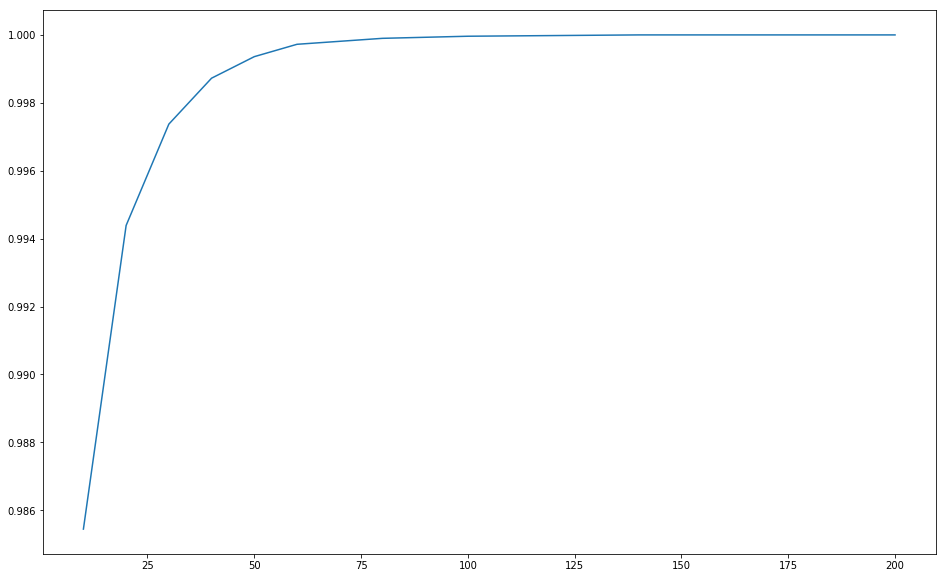

In [233]:
plt.figure(figsize=(16,10))
plt.plot(array, score)
plt.show()

In [234]:
sub['TARGET'] = rf.predict_proba(app_ts.values)[:,1]
sub.to_csv('rf_1.0.csv', index=False)